<a href="https://colab.research.google.com/github/anabiaboorges/lia1_2024_2/blob/main/Entregas%20-%20Ana%20Beatriz%20Borges/TensorFlowCifar_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# Importando o necessário
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [131]:
# Todos os DS no Keras -> https://keras.io/api/datasets/
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.fashion_mnist.load_data()

In [132]:
# Expande a dimensão do canal para grayscale (28, 28, 1)
imagens_treino = np.expand_dims(imagens_treino, axis=-1)
imagens_teste = np.expand_dims(imagens_teste, axis=-1)

In [133]:
# Redimensiona as imagens para 32x32
imagens_treino = tf.image.resize(imagens_treino, [32, 32])
imagens_teste = tf.image.resize(imagens_teste, [32, 32])

In [134]:
# Normaliza os valores de pixel para [0, 1]
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

In [180]:
# Classes das imagens
nomes_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [139]:
# Função para exibir as imagens
def visualiza_imagens(images, labels):
    plt.figure(figsize = (10,10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i]])
    plt.show()

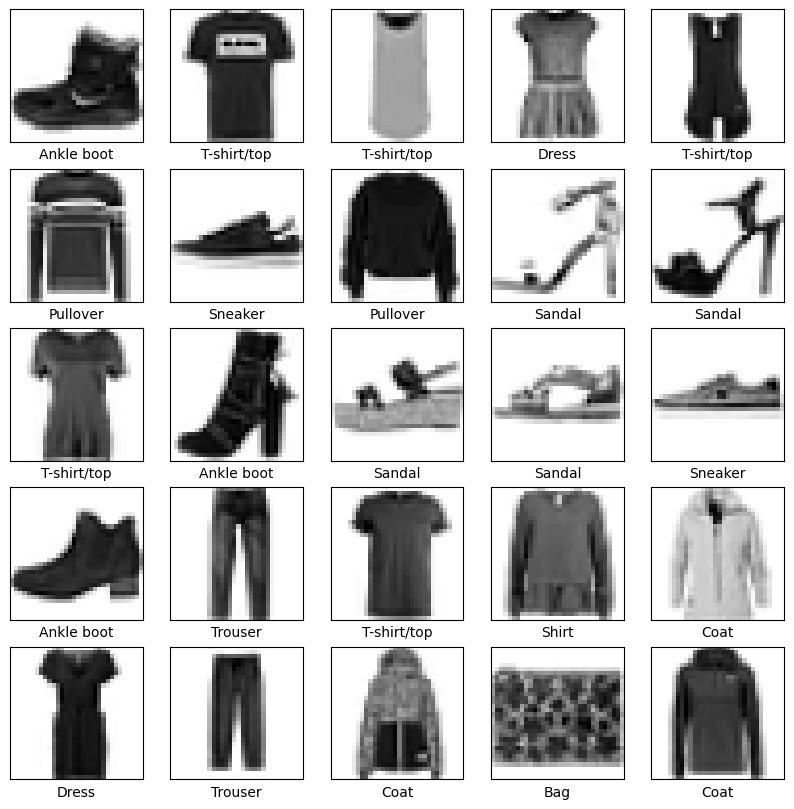

In [140]:
# Executa a função
visualiza_imagens(imagens_treino, labels_treino)


Arquitetura do Modelo para Feature Learning refere-se à estrutura e organização de um modelo de aprendizado de máquina projetado para identificar e extrair automaticamente as melhores representações (ou features) dos dados brutos. Em vez de usar features manuais, o modelo aprende representações diretamente dos dados, otimizando seu desempenho em tarefas específicas, como classificação, detecção ou reconhecimento. Redes neurais profundas, como redes convolucionais (CNNs) e redes recorrentes (RNNs), são comumente usadas para esse propósito

In [141]:
# Arquitetura do Modelo -> Feature Learning

# Cria o objeto de sequência de camadas - do Keras
modelo_ana = models.Sequential()

# Adiciona a primeira camada de convolução e max pooling (camada de entrada)
modelo_ana.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))  # Grayscale input
modelo_ana.add(layers.MaxPooling2D((2, 2)))

# Adiciona a segunda camada de convolução e max pooling (camada intermediária)
modelo_ana.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo_ana.add(layers.MaxPooling2D((2, 2)))

# Adiciona a terceira camada de convolução e max pooling (camada intermediária)
modelo_ana.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo_ana.add(layers.MaxPooling2D((2, 2)))

In [142]:
# Achata as saídas para alimentar uma camada totalmente conectada
modelo_ana.add(layers.Flatten())

In [143]:
# Adiciona camadas densas
modelo_ana.add(layers.Dense(64, activation='relu'))
modelo_ana.add(layers.Dense(10))  # 10 classes de saída

In [144]:
# Compila o modelo
modelo_ana.compile(optimizer='adam',
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

In [145]:
# Treina o modelo
modelo_ana.fit(imagens_treino, labels_treino, epochs=10,
               validation_data=(imagens_teste, labels_teste))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.7364 - loss: 0.7279 - val_accuracy: 0.8556 - val_loss: 0.3909
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 43ms/step - accuracy: 0.8712 - loss: 0.3552 - val_accuracy: 0.8714 - val_loss: 0.3494
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.8892 - loss: 0.3013 - val_accuracy: 0.8854 - val_loss: 0.3127
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9015 - loss: 0.2701 - val_accuracy: 0.8972 - val_loss: 0.2856
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 43ms/step - accuracy: 0.9112 - loss: 0.2366 - val_accuracy: 0.9052 - val_loss: 0.2696
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9182 - loss: 0.2159 - val_accuracy: 0.9015 - val_loss: 0.2750
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 44ms/step - accuracy: 0.9255 - loss: 0.2023 - val_accuracy: 0.9046 - val_loss: 0.2780
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.932

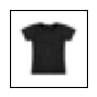

In [174]:
# Carrega uma nova imagem
nova_imagem = Image.open("/content/sample_data/blusateste.jpg")

# Converte a imagem para escala de cinza
nova_imagem = nova_imagem.convert('L')  # 'L' para grayscale

# Redimensiona para 32x32 pixels
nova_imagem = nova_imagem.resize((32, 32))

# Exibe a imagem redimensionada
plt.figure(figsize=(1,1))
plt.imshow(nova_imagem, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [175]:
nova_imagem_array = np.squeeze(nova_imagem_array)

# Certificar-se de que a imagem está com a forma (1, 32, 32, 1) antes de passar para o modelo
# Aqui assumimos que sua imagem tem 32x32 pixels e 1 canal
nova_imagem_array = nova_imagem_array.reshape(1, 32, 32, 1)


In [176]:
# Fazendo a previsão
previsoes = modelo_ana.predict(nova_imagem_array)
print("Previsões brutas:", previsoes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Previsões brutas: [[ 1.0690337  -4.5584855  -0.5310147  -0.39443076 -5.226337   -4.181538
  -0.31295025 -3.3057659   5.351932   -0.9411508 ]]


In [177]:
# Obtém a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]
print("A nova imagem foi classificada como:", nome_classe_prevista)

A nova imagem foi classificada como: Bag
